__Задача 1__

Даны значения зарплат из выборки выпускников: 
```
100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150
```
Используя только встроенные питоновские функции и структуры данных (т.е. без библиотек `numpy`, `pandas` и др.) посчитать среднее арифметическое, выборочную дисперсию, среднее квадратичное отклонение для данной выборки.

Можно затем посчитать те же значения с использованием библиотек, чтобы проверить себя.


1) среднее арифметическое:

In [1]:
a = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150]

In [2]:
sum(a)

1536

In [3]:
len(a)

21

In [4]:
mean = sum(a)/len(a)
mean

73.14285714285714

проверям наши вычисления с помощью библиотеки numpy:

In [5]:
import numpy as np
np.mean(a)

73.14285714285714

2)выборочная дисперсия:

In [6]:
var = sum((xi - mean) ** 2 for xi in a)/ len(a)
var

2135.074829931973

In [7]:
np.var(a)

2135.0748299319725

3) среднее квадратичное отклонение(равно квадратному корню из дисперсии):

In [8]:
pow(var, .5)

46.20686994302874

In [10]:
np.sqrt(var)

46.20686994302874

__Задача 2__

Для выборки из задачи 1 найти (также без использования библиотек):
1. медиану, первый и третий квартили, интерквартильное расстояние,
2. выбросы в выборке (используя для этого метод как при построении "усов" из `boxplot`). 

Возможные неоднозначности в вычислении квантилей можно разрешать любым способом.

In [13]:
a = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150]

In [22]:
a = sorted(a)
a

[17,
 24,
 25,
 30,
 33,
 45,
 55,
 57,
 65,
 65,
 70,
 75,
 75,
 77,
 80,
 84,
 89,
 90,
 100,
 150,
 230]

In [24]:
n = len(a)
n

21

Для решения данной задачи напишем функцию для нахождения квантилей. Значения n_left_elements и n_right_elements - это число элементов, которые будут левее и правее от точки квантиля(в зависимости от того, какой конкретный квантиль мы ищем).

In [31]:
def quantile(a: list, order: float):
    
    n_left_elements = int(n * order)
    n_right_elements = int(n * (1 - order))
    
    print(n, n_left_elements, n_right_elements)
    
    if n_left_elements + n_right_elements == n:
        return (a[n_left_elements - 1] + a[n_right_elements]) / 2 
    else:
        assert n_left_elements + n_right_elements == n - 1
        
        return a[n_left_elements]

Медиана- квантиль порядка 0.5:

In [34]:
def median(a:list):
    return quantile(a, 0.5)

In [33]:
median(a)

21 10 10


70

Первый квартиль - квантиль порядка 0.25:

In [35]:
q_1 = quantile(a, 0.25)
q_1

21 5 15


45

Третий квартиль - квантиль порядка 0.75:

In [36]:
q_3 = quantile(a, 0.75)
q_3

21 15 5


84

Проверям наши вычисления с помощью библиотеки numpy: 

In [37]:
np.median(a)

70.0

In [38]:
np.percentile(a, 25)

45.0

In [39]:
np.percentile(a, 75)

84.0

Интерквартильное расстояние:

In [42]:
iqd = q_3 - q_1
iqd

39

Находим выбросы:

In [45]:
boxplot_range = (q_1 - 1.5 * iqd, q_3 + 1.5 * iqd)
boxplot_range

(-13.5, 142.5)

Все, что выходит за рамки значений (-13.5, 142.5) - и есть выбросы


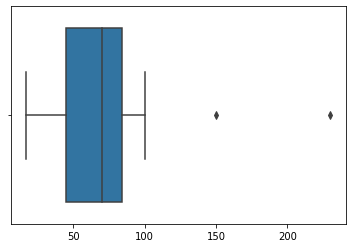

In [46]:
import seaborn as sns
sns.boxplot(a)

In [47]:
a

[17,
 24,
 25,
 30,
 33,
 45,
 55,
 57,
 65,
 65,
 70,
 75,
 75,
 77,
 80,
 84,
 89,
 90,
 100,
 150,
 230]

Видим, что на графике отображено 2 выброса (больше 142.5)- это значения 150 и 230 в нашей выборке